# 主成分分析（PCA）

找到一根轴，使得样本空间所有的点映射到这根轴上时，方差最大

1. 一个非监督学习算法

2. 主要用于数据的降维

3. 通过降维使人们更容易把握数据的特征

4. 其他用途：可视化，去噪

目标：求一个方向向量 w，使得 $Var(X_{project})=\frac1m\sum_{i=1}^m(X^{(i)}\cdot w)^2$ 最大

即，求目标函数最优化，使用梯度向上解决

In [1]:
#制作数据集

import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1) #主成分个数
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [3]:
pca.components_ #主成分向量

array([[-0.79716156, -0.60376606]])

In [4]:
X_reduction = pca.transform(X) #降维

In [5]:
X_restore = pca.inverse_transform(X_reduction) #数据还原到原空间

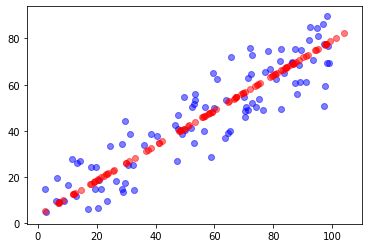

In [6]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()

# PCA实战举例

In [8]:
from sklearn import datasets

digit = datasets.load_digits()
X = digit.data
y = digit.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [9]:
X_train.shape

(1347, 64)

In [10]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

CPU times: user 65.4 ms, sys: 1.06 ms, total: 66.5 ms
Wall time: 65.7 ms


0.9866666666666667

In [11]:
#降维特征对比

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [12]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)
knn_clf.score(X_test_reduction, y_test)

CPU times: user 22.5 ms, sys: 8.69 ms, total: 31.2 ms
Wall time: 23.2 ms


0.6066666666666667

In [13]:
pca.explained_variance_ratio_ #主成分可解释的方差比例

array([0.14566817, 0.13735469])

In [14]:
#于是我们可以进行主成分解释能力的排序

pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_ 

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

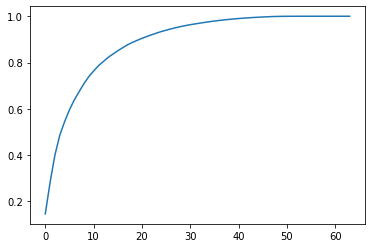

In [27]:
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])]
        )
plt.show()

In [28]:
pca = PCA(0.95) #解释占95%以上的信息的主成分
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [29]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)
knn_clf.score(X_test_reduction, y_test)

CPU times: user 31 ms, sys: 868 µs, total: 31.8 ms
Wall time: 31 ms


0.98

综上：PCA可以在保证不丢失主要信息的情况下，减少运算的负担

# MNIST数据集

In [31]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version='active')

In [33]:
X, y = mnist['data'], mnist['target']

In [34]:
X_train = np.array(X[:60000], dtype=float)
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)

### 使用KNN进行训练

In [35]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

CPU times: user 12.7 s, sys: 115 ms, total: 12.8 s
Wall time: 12.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
%time knn_clf.score(X_test, y_test)

CPU times: user 11min 13s, sys: 516 ms, total: 11min 14s
Wall time: 11min 14s


0.9688

**降维处理**

In [37]:
pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

X_train_reduction.shape[1]/X_train.shape[1] #主成分所占比例

0.11096938775510204

In [38]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

CPU times: user 334 ms, sys: 2.84 ms, total: 337 ms
Wall time: 336 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
%time knn_clf.score(X_test_reduction, y_test)

CPU times: user 1min 9s, sys: 62.3 ms, total: 1min 9s
Wall time: 1min 9s


0.9728

降维后准确率反而提高——**降噪**